# Expectation score vs Precision

- **Expectation score @K: No. of positive documents in the first K documents**
- **Precision @K: No. of positive documents in the first K documents/K**


- Always cummulative, **@15 = @(15-10) + @10**
- Upward trend
- Not generally used in IR system evaluation -- slope is usefull

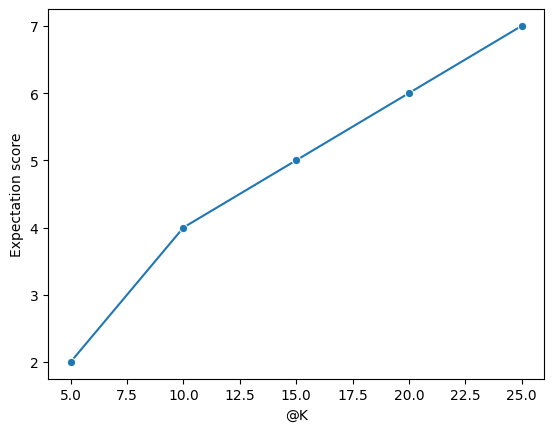

In [28]:
get_expectation_score() # query: Big Data, KI für Analyse

$$ ME = (\sum_{i=1}^N E_i)/N $$

# Mean Average Precision(MAP)

- Generally used in IR sytem evaluation
- MAP = **(P@5+@10+@15+@20+@25)**/5 -- falsch
- **N: No. of Queries eg: 20**

$$ MAP = (\sum_{i=1}^N AP_i)/N $$

# Average Precision(AP)

- **j: Query name**
- **n: No. of retrieved documents eg: 10**
- **g: Positive document count eg: 3**
- **indexes: [2, 5, 9]**
- **AP = (P@2+@5+@9)/3**


$$ AP_j = (\sum_{i=1}^g P_i)/g $$

In [22]:
get_avg_precision(query_name='Architekturanalyse')

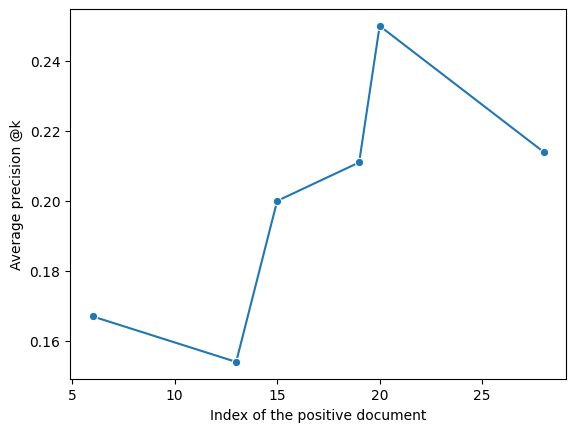

In [23]:
get_avg_precision(query_name='Waffen Systeme')

In [1]:
import pandas as pd
import os
import string
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
def read_document_data(filepath):

    try:
        with open(filepath, 'r') as f:
            data_dict = json.load(f)
    except Exception as e:
        data_dict = dict()
        print(e)

    return data_dict

In [4]:
avg_precision_data = []
filepath = os.getcwd()+'/../dataframes/average_precision_query/IR1/'

for file in os.listdir(filepath):
    avg_precision_data.append(read_document_data(filepath+file))

In [21]:
def get_avg_precision(query_name):
    
    for prec in avg_precision_data:
    
        x = []
        y = []
        query = None

        for key, value in prec.items():
            if key != 'query':
                x.append(int(key))
                y.append(value)
            else:
                query = value

        if len(x) > 1 and query == query_name:
#             print(f'Query: ===========  {query}  ============')
            plt.ylabel('Average precision @k')
            plt.xlabel('Index of the positive document')
            sns.lineplot(x=x, y=y, marker="o")
            plt.show()

In [27]:
def get_expectation_score():
    
    exp_df = pd.read_pickle(os.getcwd()+'/../dataframes/expectation_data/expectation_Big Data, KI für Analyse_ranking.pkl')

    exp_score_5 = 0
    exp_score_10 = 0
    exp_score_15 = 0
    exp_score_20 = 0
    exp_score_25 = 0

    for idx, row in exp_df.iterrows():

        if row['label'] in [1]:
            if idx < 5:
                exp_score_5 += 1
            elif idx < 10:
                exp_score_10 += 1
            elif idx < 15:
                exp_score_15 += 1
            elif idx < 20:
                exp_score_20 += 1
            elif idx < 25:
                exp_score_25 += 1

    exp_score_10 += exp_score_5
    exp_score_15 += exp_score_10
    exp_score_20 += exp_score_15
    exp_score_25 += exp_score_20

    x1 = [5, 10, 15, 20, 25]
    y1 = [exp_score_5, exp_score_10, exp_score_15, exp_score_20, exp_score_25]

    plt.ylabel('Expectation score')
    plt.xlabel('@K')

    sns.lineplot(x=x1, y=y1, marker="o")